In [1]:
from keras.datasets import mnist

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
digit = train_images[4]

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

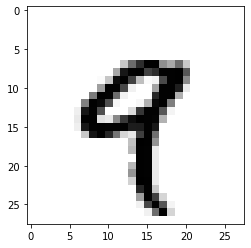

In [8]:
plt.imshow(digit, cmap=plt.cm.binary)

## 영화 리뷰 분류: 이진 분류 예제

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words= 10000)

In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
                          [(value, key) for (key, value) in word_index.items()])

In [7]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[1]])

In [8]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [9]:
import numpy as np

In [10]:
def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [11]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [12]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [13]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## 모델 정의하기

In [14]:
from keras import models, layers

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## 모델 컴파일

In [17]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

## 옵티마이저 설정하기

In [18]:
from keras import optimizers, losses, metrics

In [19]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

## 훈련검증

In [20]:
x_validation = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

In [22]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation, y_validation))

Epoch 1/20
30/30 [==============================] - 3s 112ms/step - loss: 0.5295 - acc: 0.7953 - val_loss: 0.4037 - val_acc: 0.8647
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3255 - acc: 0.8997 - val_loss: 0.3281 - val_acc: 0.8735
Epoch 3/20
30/30 [==============================] - 1s 47ms/step - loss: 0.2367 - acc: 0.9227 - val_loss: 0.2818 - val_acc: 0.8914
Epoch 4/20
30/30 [==============================] - 1s 47ms/step - loss: 0.1851 - acc: 0.9391 - val_loss: 0.2757 - val_acc: 0.8899
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1479 - acc: 0.9533 - val_loss: 0.3430 - val_acc: 0.8674
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1251 - acc: 0.9624 - val_loss: 0.2897 - val_acc: 0.8874
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1059 - acc: 0.9676 - val_loss: 0.3207 - val_acc: 0.8800
Epoch 8/20
30/30 [==============================] - 2s 55ms/step - loss: 0.0874 - 

In [23]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

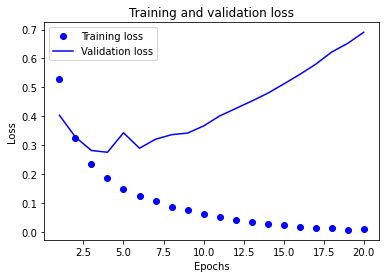

In [24]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()